In [1]:
'''
Datasets source: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

Code references: https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/
'''

# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from copy import deepcopy

In [2]:
bitcoin = pd.read_csv("Datasets/coin_Bitcoin.csv")
ethereum = pd.read_csv("Datasets/coin_Ethereum.csv")
litecoin = pd.read_csv("Datasets/coin_Litecoin.csv")
dogecoin = pd.read_csv("Datasets/coin_Dogecoin.csv")
cardano = pd.read_csv("Datasets/coin_Cardano.csv")
polkadot = pd.read_csv("Datasets/coin_Polkadot.csv")


date = bitcoin
date = date[(date['Date'] >= '2021-01-01 23:59:59')]
date.reset_index(inplace=True)
date = date['Date']

# Closing price
bitcoin = bitcoin[(bitcoin['Date'] >= '2021-01-01 23:59:59')]
bitcoin.reset_index(inplace=True)
bitcoin = bitcoin['Close']


ethereum = ethereum[(ethereum['Date'] >= '2021-01-01 23:59:59')]
ethereum.reset_index(inplace=True)
ethereum = ethereum['Close']

litecoin = litecoin[(litecoin['Date'] >= '2021-01-01 23:59:59')]
litecoin.reset_index(inplace=True)
litecoin = litecoin['Close']

dogecoin = dogecoin[(dogecoin['Date'] >= '2021-01-01 23:59:59')]
dogecoin.reset_index(inplace=True)
dogecoin = dogecoin['Close']

cardano = cardano[(cardano['Date'] >= '2021-01-01 23:59:59')]
cardano.reset_index(inplace=True)
cardano = cardano['Close']

polkadot = polkadot[(polkadot['Date'] >= '2021-01-01 23:59:59')]
polkadot.reset_index(inplace=True)
polkadot = polkadot['Close']

d6 = {"Date": date, "BTC": bitcoin, "ETH": ethereum, "LTC": litecoin, "DOGE": dogecoin, "ADA": cardano, "DOT":polkadot}
d5 = {"Date": date, "BTC": bitcoin, "ETH": ethereum, "LTC": litecoin, "DOGE": dogecoin, "ADA": cardano}
d4 = {"Date": date, "BTC": bitcoin, "ETH": ethereum, "LTC": litecoin, "DOGE": dogecoin}
d3 = {"Date": date, "BTC": bitcoin, "ETH": ethereum, "LTC": litecoin}
d2 = {"Date": date, "BTC": bitcoin, "ETH": ethereum}

data6 = pd.DataFrame(data = d6)
data6['Date'] = pd.to_datetime(data6['Date'])
data6.set_index('Date',inplace=True)

data5 = pd.DataFrame(data = d5)
data5['Date'] = pd.to_datetime(data5['Date'])
data5.set_index('Date',inplace=True)

data4 = pd.DataFrame(data = d4)
data4['Date'] = pd.to_datetime(data4['Date'])
data4.set_index('Date',inplace=True)

data3 = pd.DataFrame(data = d3)
data3['Date'] = pd.to_datetime(data3['Date'])
data3.set_index('Date',inplace=True)

data2 = pd.DataFrame(data = d2)
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date',inplace=True)

In [3]:
# Log of percentage change
cov_matrix6 = data6.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix5 = data5.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix4 = data4.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix3 = data3.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix2 = data2.pct_change().apply(lambda x: np.log(1+x)).cov()

In [4]:
# Yearly returns for individual assets
er6 = data6.resample('Y').last().mean()
er5 = data5.resample('Y').last().mean()
er4 = data4.resample('Y').last().mean()
er3 = data3.resample('Y').last().mean()
er2 = data2.resample('Y').last().mean()

In [5]:
# Volatility is given by the annual standard deviation.
sd6 = data6.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(360))
sd5 = data5.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(360))
sd4 = data4.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(360))
sd3 = data3.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(360))
sd2 = data2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(360))

In [12]:
# Genetic Algorithm
PopSize     = 100   # Size of the Population(i.e Number of Chromosomes)
assets      = len(data6.columns)
Iterations  = 31    # Number of Iterations
crossover_rate 	    = 0.5  # Crossover Rate
mutation_rate 	    = 0.5   # Mutation Rate
OptimizedChromo  = []    # Rember Global Best after every iteration
OptimizedChromo_mutation  = []    # Rember Global Best after every iteration
fitness_values = [[],[]]

class Portfolio:
    def __init__(self, C, F):
        self.Chromosome = C
        self.Fitness = F
        
def Init(assets=assets):
    for i in range (0, PopSize):
        weights = np.random.random(assets)
        weights = weights/np.sum(weights)
        Chromosome = weights
        
        fitness = FitnessFunction(Chromosome,assets)
        NewPortfolio = Portfolio(Chromosome, fitness)
        Pop.append(NewPortfolio)
        
def MemoriseOptimizedChromo():
    global OptimizedChromo
    for p in Pop:
        if p.Fitness > OptimizedChromo.Fitness:
            OptimizedChromo=p
            
def MemoriseOptimizedChromo_mutation():
    global OptimizedChromo_mutation
    for p in Pop_mutation:
        if p.Fitness > OptimizedChromo_mutation.Fitness:
            OptimizedChromo_mutation=p
            
# Function 3: Do the Crossover Operation
def Crossover(assets=assets):
    for i in range(0,PopSize):

        if (random.random() <= crossover_rate):

            # Choose two indices
            r1=random.randint(0,PopSize-1)
            r2=random.randint(0,PopSize-1)

            # Parents
            p1=Pop[r1]
            p2=Pop[r2]

            # Choose a crossover point 
            pt = random.randint(1,assets-1)
            
            # Generate new childs 
            c1=np.concatenate((p1.Chromosome[0:pt],p2.Chromosome[pt:]))
            c2=np.concatenate((p2.Chromosome[0:pt],p1.Chromosome[pt:]))

            # Get the fitness of childs
            c1Fitness=FitnessFunction(c1,assets)
            c2Fitness=FitnessFunction(c2,assets)

            # Select between parent and child
            if c1Fitness > p1.Fitness:
                Pop[r1].Fitness=c1Fitness
                Pop[r1].Chromosome=c1
                
            if c2Fitness > p2.Fitness:
                Pop[r2].Fitness=c2Fitness
                Pop[r2].Chromosome=c2

     
    
# Function 4: Do the Mutation Operation
def Mutation(assets=assets):
    global UB, LB
    for i in range(0,PopSize):

        if (random.random() <= mutation_rate):
            
            # Choose random index
            r=random.randint(0,PopSize-1)

            # Choose a parent
            p=deepcopy(Pop_mutation[r])

            # Choose mutation point 
            pt1 = random.randint(0,assets-1)
            pt2 = random.randint(0,assets-1)
            
            # Generate new children
            c=deepcopy(p.Chromosome)
            
            # Mutation
            c[pt1],c[pt2] = c[pt2],c[pt1]

            #Get the fitness of childs
            cFitness=FitnessFunction(c,assets)

            # Select between parent and child
            if cFitness > p.Fitness:
                Pop_mutation[r].Fitness=cFitness
                Pop_mutation[r].Chromosome=c

def FitnessFunction(chromo,a):
    if a == 2:
        ind_er = er2
        cov_matrix = cov_matrix2
    elif a == 3:
        ind_er = er3
        cov_matrix = cov_matrix3
    elif a == 4:
        ind_er = er4
        cov_matrix = cov_matrix4
    elif a == 5:
        ind_er = er5
        cov_matrix = cov_matrix5
    elif a == 6:
        ind_er = er6
        cov_matrix = cov_matrix6
    else:
        pass
    
    
    port_er = (chromo[0]*ind_er).sum()
    
    var = cov_matrix.mul(chromo, axis=0).mul(chromo, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(360) # Annual standard deviation = volatility
    
    fitness_values[0].append(port_er)
    fitness_values[1].append(ann_sd)
    return port_er/ann_sd


No. of assets:  2
Best Chromosome after natural selection: [9.99392439e-01 6.07561408e-04] 	Fitness: 39568.622818950804
Best Chromosome after crossover:  [9.99392439e-01 6.07561408e-04] 	Fitness: 39568.622818950804
Best Chromosome after mutation: [9.99392439e-01 6.07561408e-04] 	Fitness: 39568.622818950804 

No. of assets:  3
Best Chromosome after natural selection: [0.82568364 0.10239491 0.07192145] 	Fitness: 31944.5754908146
Best Chromosome after crossover:  [0.82568364 0.02299689 0.00580464] 	Fitness: 38296.105109363445
Best Chromosome after mutation: [0.82568364 0.02299689 0.00580464] 	Fitness: 38296.105109363445 

No. of assets:  4
Best Chromosome after natural selection: [0.62810516 0.2378739  0.04816327 0.08585767] 	Fitness: 22285.374112207744
Best Chromosome after crossover:  [0.62810516 0.01651471 0.02042759 0.01711934] 	Fitness: 35872.88296710328
Best Chromosome after mutation: [0.62810516 0.01711934 0.02042759 0.01651471] 	Fitness: 35890.43924853081 

No. of assets:  5
Best 

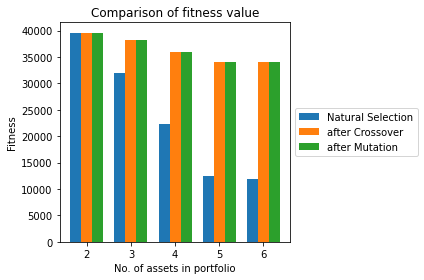

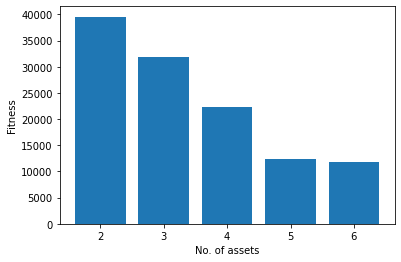

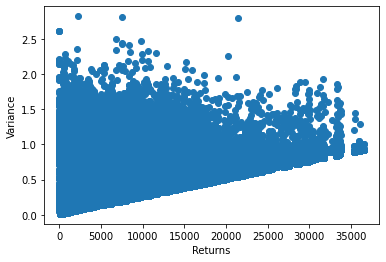

In [17]:
result_natural_selection = []
result_natural_selection_with_crossover = []
result_natural_selection_with_crossover_and_mutation = []
# result_no_of_iterations = []

for i in range(2,7):
    print("No. of assets: ",i)
    Pop = []
    Pop_mutation = []
    Init(i)
    OptimizedChromo=Pop[0]
    OptimizedChromo_mutation=Pop[0]
    MemoriseOptimizedChromo()
    
    print("Best Chromosome after natural selection:", OptimizedChromo.Chromosome, "\tFitness:", OptimizedChromo.Fitness)
    result_natural_selection.append(OptimizedChromo.Fitness)
#     result_no_of_iterations.append(OptimizedChromo.Fitness)
    
    for j in range(1,Iterations):
        Crossover(i)
        Pop_mutation = deepcopy(Pop)
        Mutation(i)
        MemoriseOptimizedChromo() # For crossover
        MemoriseOptimizedChromo_mutation() # For mutation
#         if j%10 == 0:
#             print("Best Chromosome after ", j , " iterations: ",OptimizedChromo_mutation.Chromosome, "\tFitness:", OptimizedChromo_mutation.Fitness,"\n")
#             result_no_of_iterations.append(OptimizedChromo_mutation.Fitness)
    print("Best Chromosome after crossover: ", OptimizedChromo.Chromosome, "\tFitness:", OptimizedChromo.Fitness)
    print("Best Chromosome after mutation:", OptimizedChromo_mutation.Chromosome, "\tFitness:", OptimizedChromo_mutation.Fitness,"\n")
    result_natural_selection_with_crossover.append(OptimizedChromo.Fitness)
    result_natural_selection_with_crossover_and_mutation.append(OptimizedChromo_mutation.Fitness)

'''
Grouped Bar plot: Fitness v/s No. of assets
'''
x = np.arange(1,10,2)  # the label locations
width = 0.5  # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, result_natural_selection , width, label='Natural Selection')
rects2 = ax.bar(x , result_natural_selection_with_crossover , width, label='after Crossover')
rects3 = ax.bar(x + width, result_natural_selection_with_crossover_and_mutation , width, label='after Mutation')

ax.set_ylabel('Fitness')
ax.set_xlabel('No. of assets in portfolio')
ax.set_title('Comparison of fitness value')
ax.set_xticks(x)
ax.set_xticklabels([2,3,4,5,6])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

'''
Bar plot: Fitness v/s No. of assets
'''
plt.bar([2,3,4,5,6],result_natural_selection)
plt.xlabel("No. of assets")
plt.ylabel("Fitness")
plt.show()

'''
Line plot: Fitness v/s No. of iterations
'''
# plt.plot([0,10,20,30,40,50,60,70,80,90,100],result_no_of_iterations)
# plt.xlabel("No. of iterations")
# plt.ylabel("Fitness")
# plt.show()

'''
Line plot: Fitness v/s Population size
'''
# plt.plot([10,20,30,40,50,60,70,80,90,100],result_natural_selection_with_crossover_and_mutation)
# plt.xlabel("Population size")
# plt.ylabel("Fitness")
# plt.show()

'''
Scatter plot: Returns v/s Variance
'''
plt.scatter(fitness_values[0],fitness_values[1])
plt.xlabel("Returns")
plt.ylabel("Variance")
plt.show()